In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Looking at our Dataset

In [3]:
df = pd.read_excel('data/no_nans_data.xlsx')
fbref = pd.read_excel('data/Complete_FBREF.xlsx')

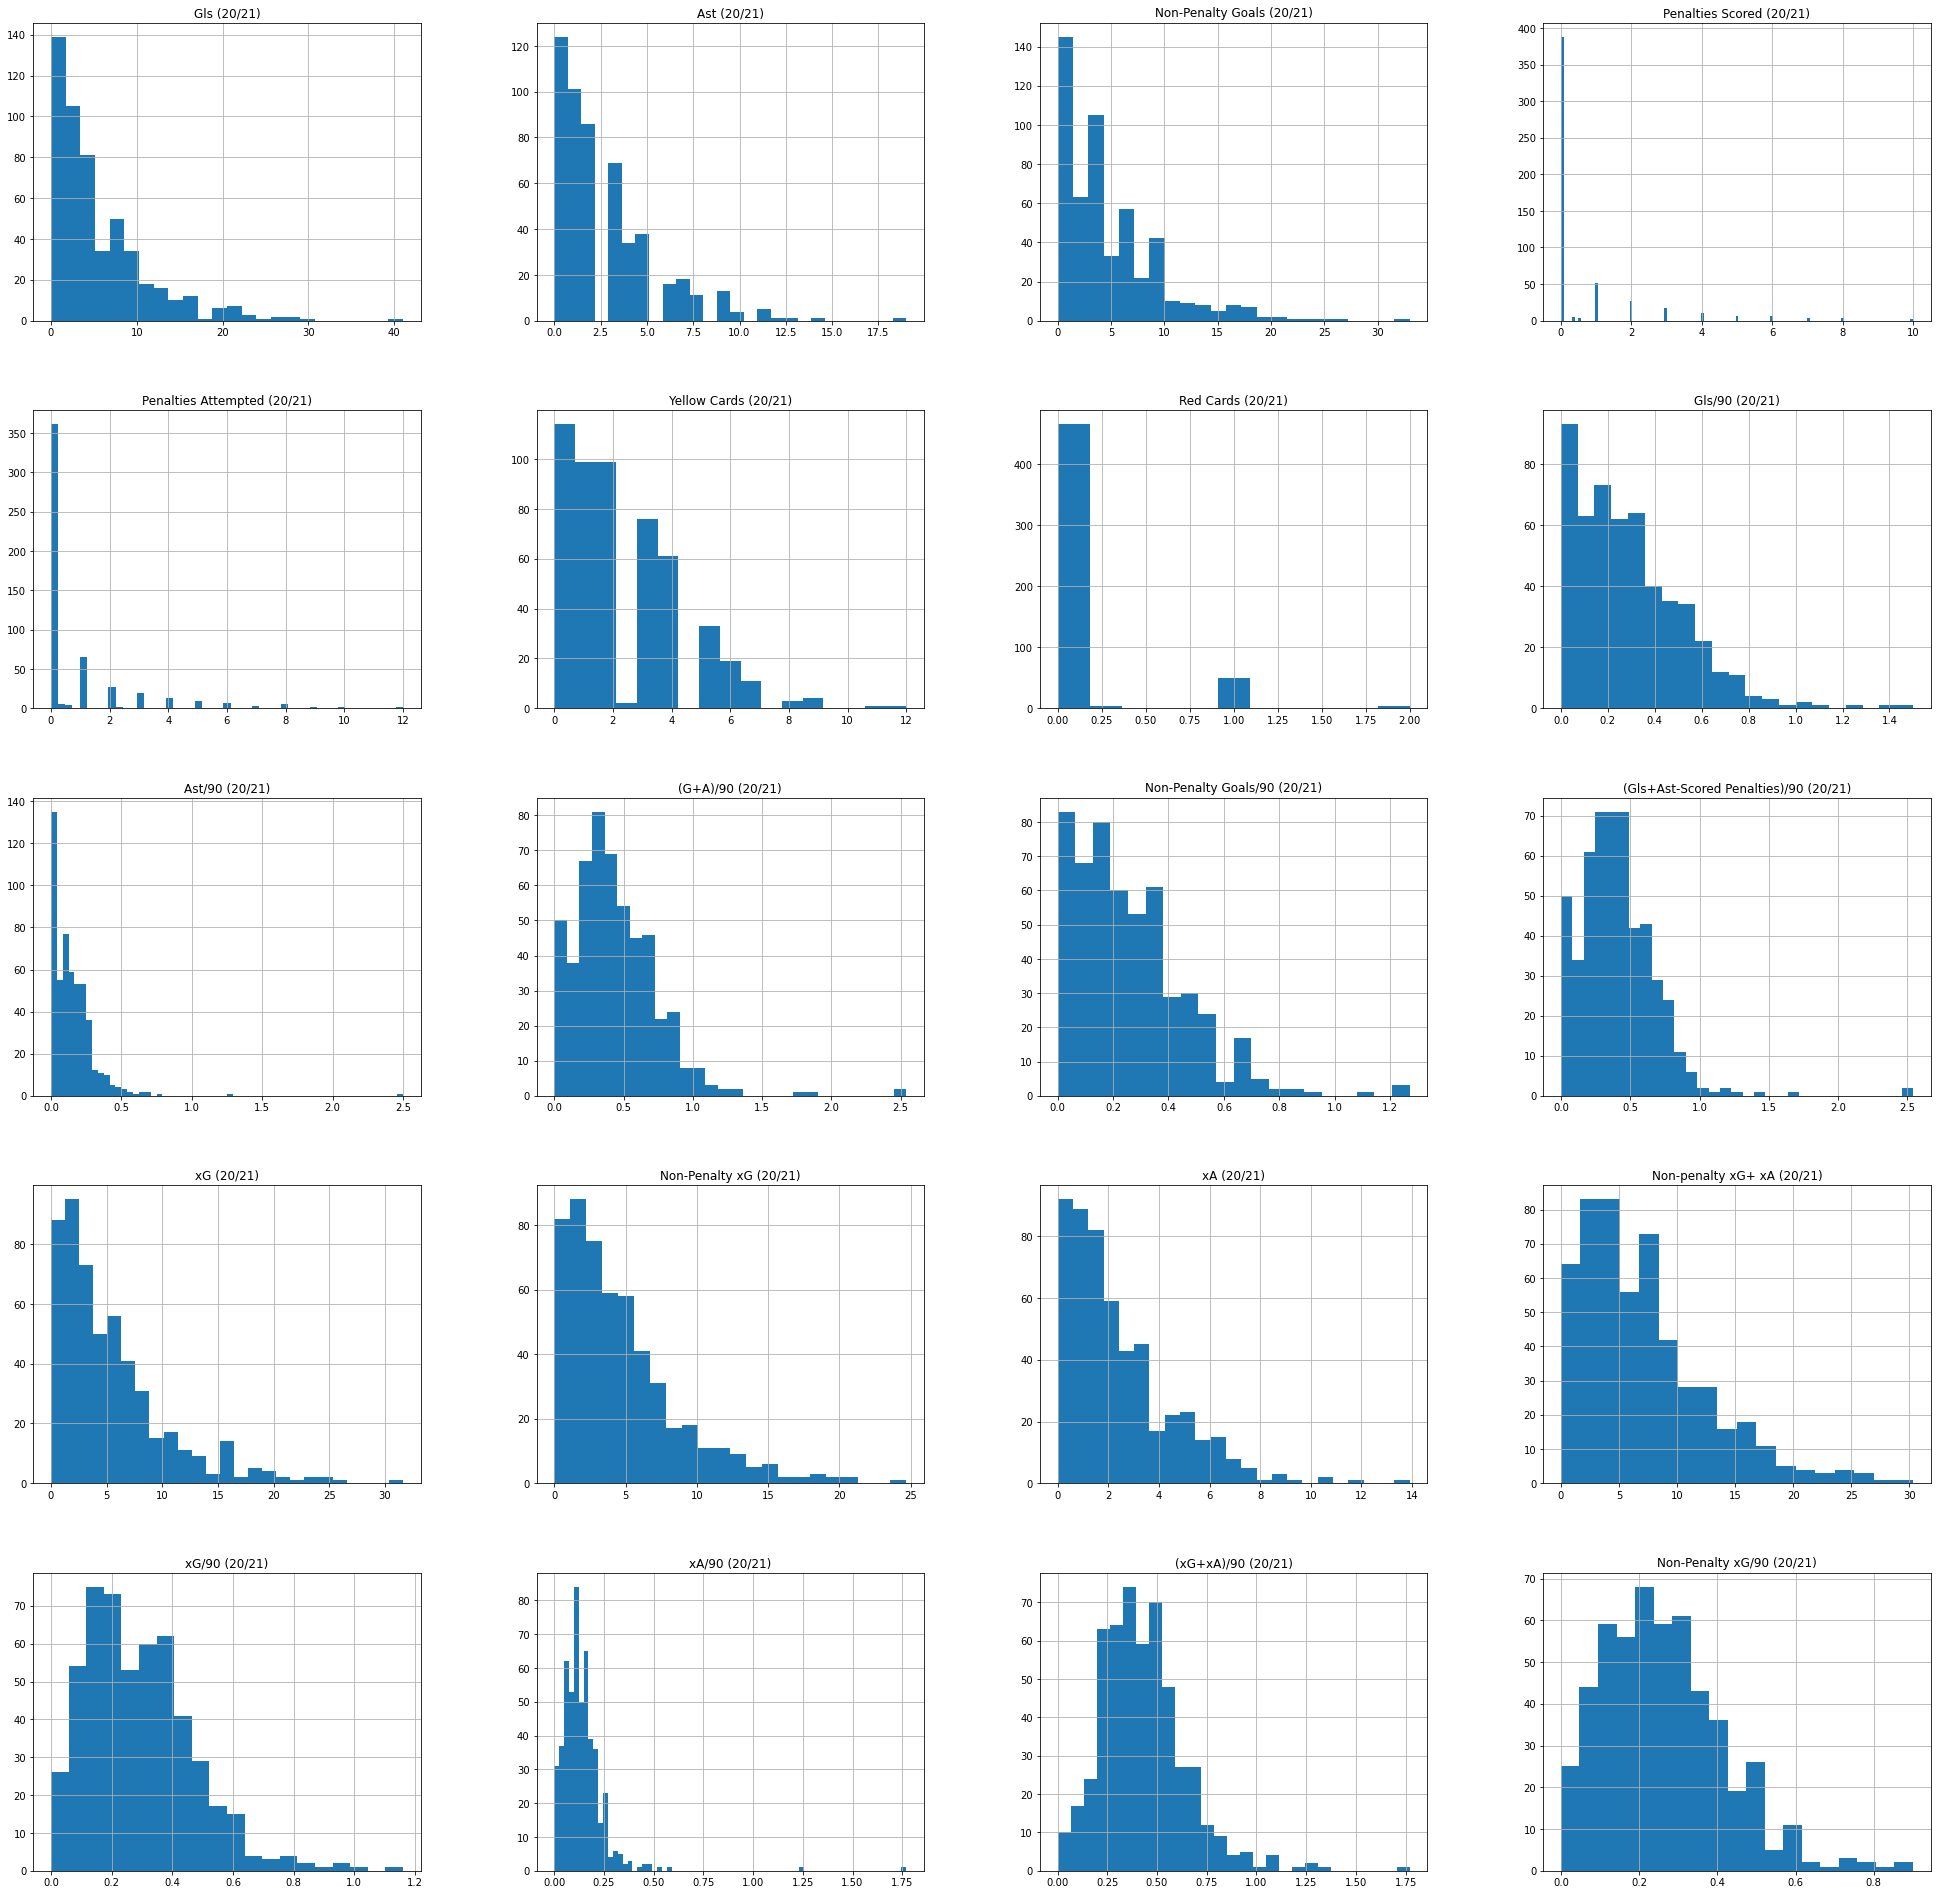

In [6]:
df[df['Position']=='attack'].iloc[:,12:32].hist(figsize=(34, 34), bins='auto');

In [7]:
fbref

,Player,Squad (20/21),MP (20/21),Starts (20/21),Min (20/21),Total Mins/90 (20/21),Gls (20/21),Ast (20/21),Non-Penalty Goals (20/21),Penalties Scored (20/21),...,Offsides (17/18),Crosses (17/18),Interceptions (17/18),Penalty Kicks Won (17/18),Penalties Conceded (17/18),Own Goals (17/18),Total Loose Balls Recovered (17/18),Aerial Duel Won (17/18),Aerial Duel Lost (17/18),% Aerial Duels Won (17/18)
0,Pierre Hojbjerg,Tottenham,38.0,38.0,3420.0,38.0,2.0,4.0,2.0,0.0,...,1.0,12.0,49.0,0.0,0.0,0.0,251.0,44.0,35.0,55.700000
1,Hugo Lloris,Tottenham,38.0,38.0,3420.0,38.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,186.0,0.0,0.0,NaN
2,Emiliano Martinez,Aston Villa,38.0,38.0,3420.0,38.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,28.0,0.0,0.0,NaN
3,Aaron Ramsdale,Sheffield Utd,38.0,38.0,3420.0,38.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Kasper Schmeichel,Leicester City,38.0,38.0,3420.0,38.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,194.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4139,Eneko Boveda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,17.0,18.0,0.0,0.0,1.0,145.0,15.0,21.0,41.666667
4140,Bojan Krkic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,6.0,0.0,0.0,0.0,35.0,1.0,6.0,14.285714
4141,Alin Tosca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,11.0,13.0,0.0,0.0,1.0,164.0,17.0,7.0,70.833333
4142,Nacho Gil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,9.0,11.0,1.0,0.0,0.0,73.0,5.0,7.0,41.666667


In [107]:
attackers = df[df['Position']=='attack']
midfielders = df[df['Position']=='midfield']
defenders = df[df['Position']=='Defender']

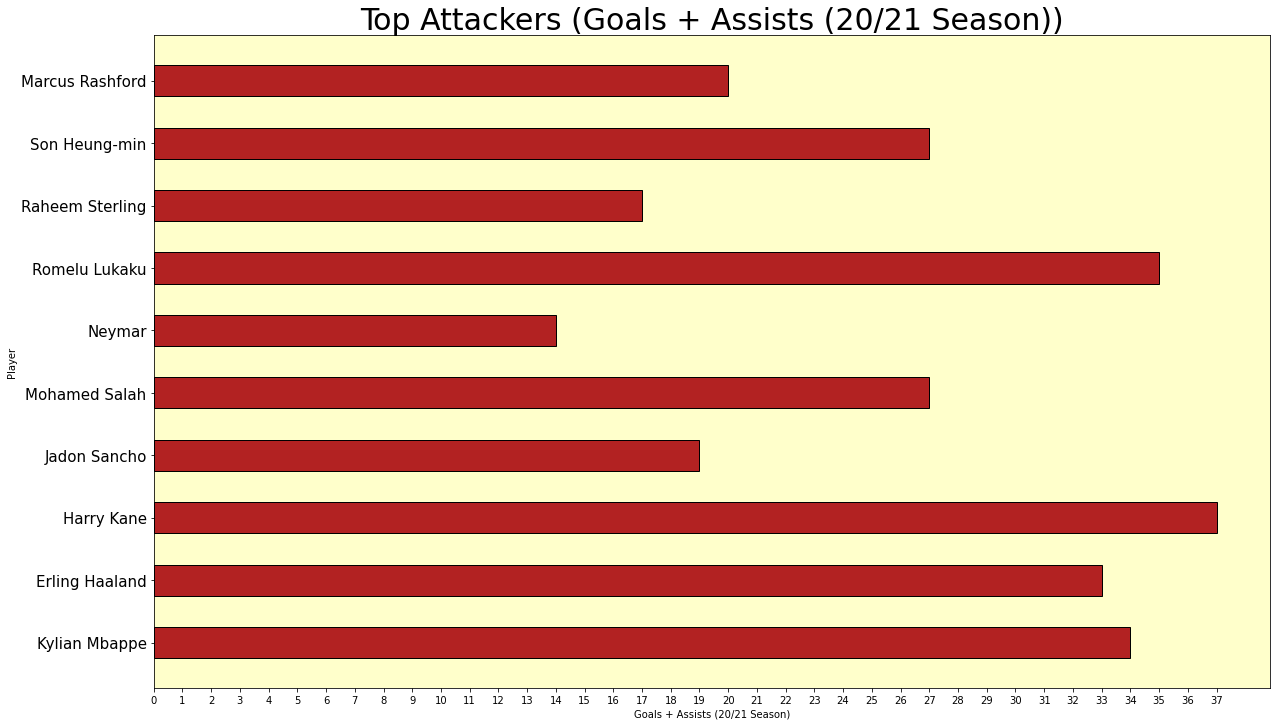

In [155]:
fig, ax = plt.subplots(figsize=(20,12))

y_labels = [a for a in attackers['Player'][:10]]
y_ticks = list(range(1,(len(y_labels)+1)))
x_values = [a + b for a,b in zip(attackers['Gls (20/21)'][:10],attackers['Ast (20/21)'][:10])]
x_ticks = list(range(0,int(max(x_values)+1)))


ax.barh(y_ticks,x_values,0.5,color = 'firebrick',edgecolor='black')


ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels,fontsize=15)
ax.set_ylabel('Player')
ax.set_xlabel('Goals + Assists (20/21 Season)')
ax.set_title('Top Attackers (Goals + Assists (20/21 Season))',fontsize=30)
ax.set_facecolor('xkcd:ivory');

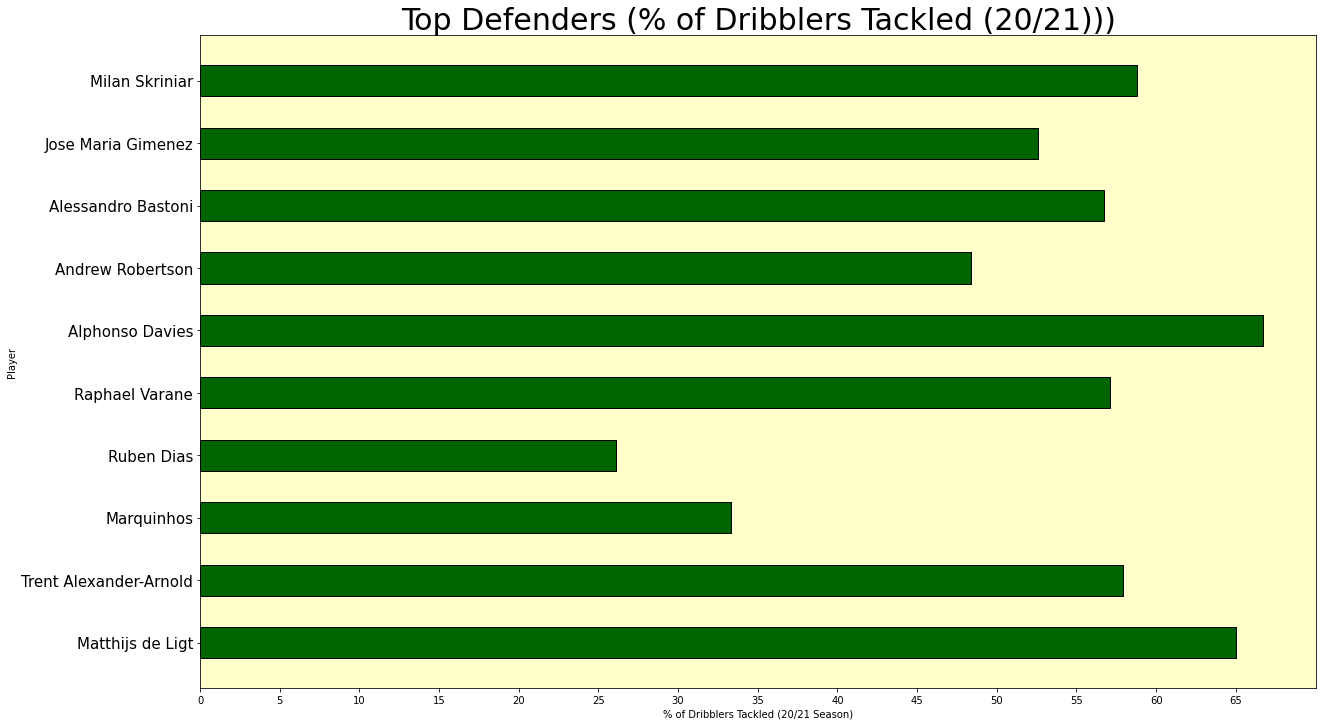

In [156]:
fig, ax = plt.subplots(figsize=(20,12))

y_labels = [a for a in defenders['Player'][:10]]
y_ticks = list(range(1,(len(y_labels)+1)))
x_values = [a for a in defenders['% of Dribblers Tackled (20/21)'][:10]]
x_ticks = list(range(0,int(max(x_values)+1),5))

ax.barh(y_ticks,x_values,0.5,color='darkgreen',edgecolor='black')

ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels,fontsize=15)
ax.set_ylabel('Player')
ax.set_xlabel('% of Dribblers Tackled (20/21 Season)')
ax.set_title('Top Defenders (% of Dribblers Tackled (20/21)))',fontsize=30)
ax.set_facecolor('xkcd:ivory');

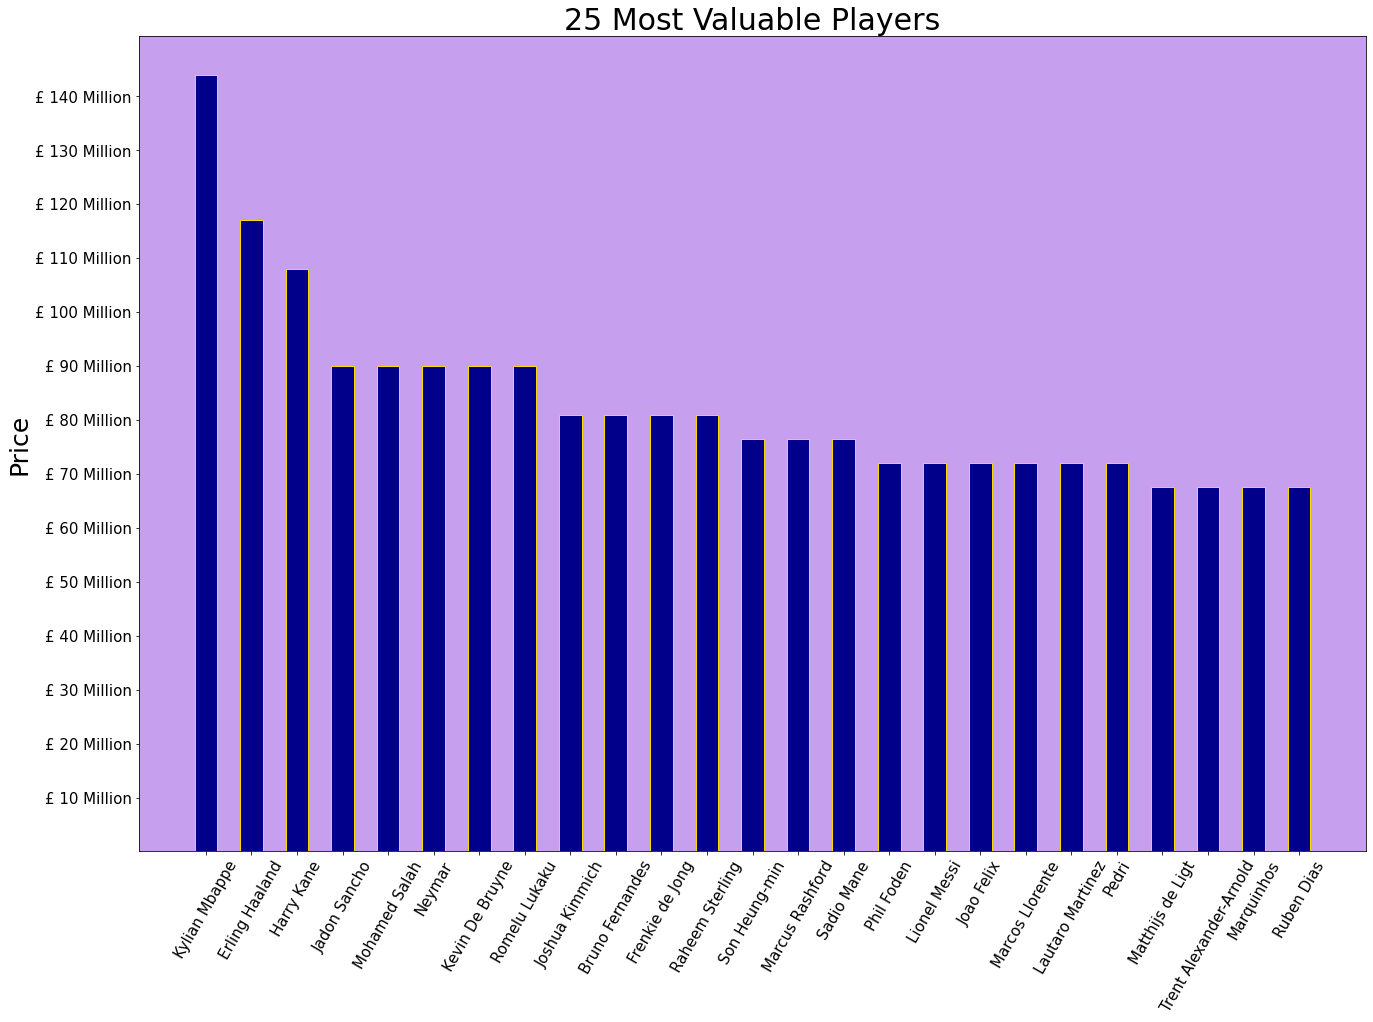

In [246]:
fig, ax = plt.subplots(figsize=(22,15))

x_labels = [a for a in df['Player'][:25]]
x_ticks = range(0,(len(x_labels)))
y_values = [a for a in df['Value'][:25]]
y_ticks = list(range(10000000,(max(df['Value'])+5000000),10000000))
y_ticklabels = [f'£ {int(a/1000000)} Million' for a in y_ticks]


ax.bar(x_ticks,y_values,0.5,edgecolor='gold',color='darkblue')


ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels,rotation=60,fontsize=15)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticklabels,fontsize=15)
ax.set_ylabel('Price',fontsize=25)
ax.set_title('25 Most Valuable Players',fontsize=30)
ax.set_facecolor('xkcd:lavender');

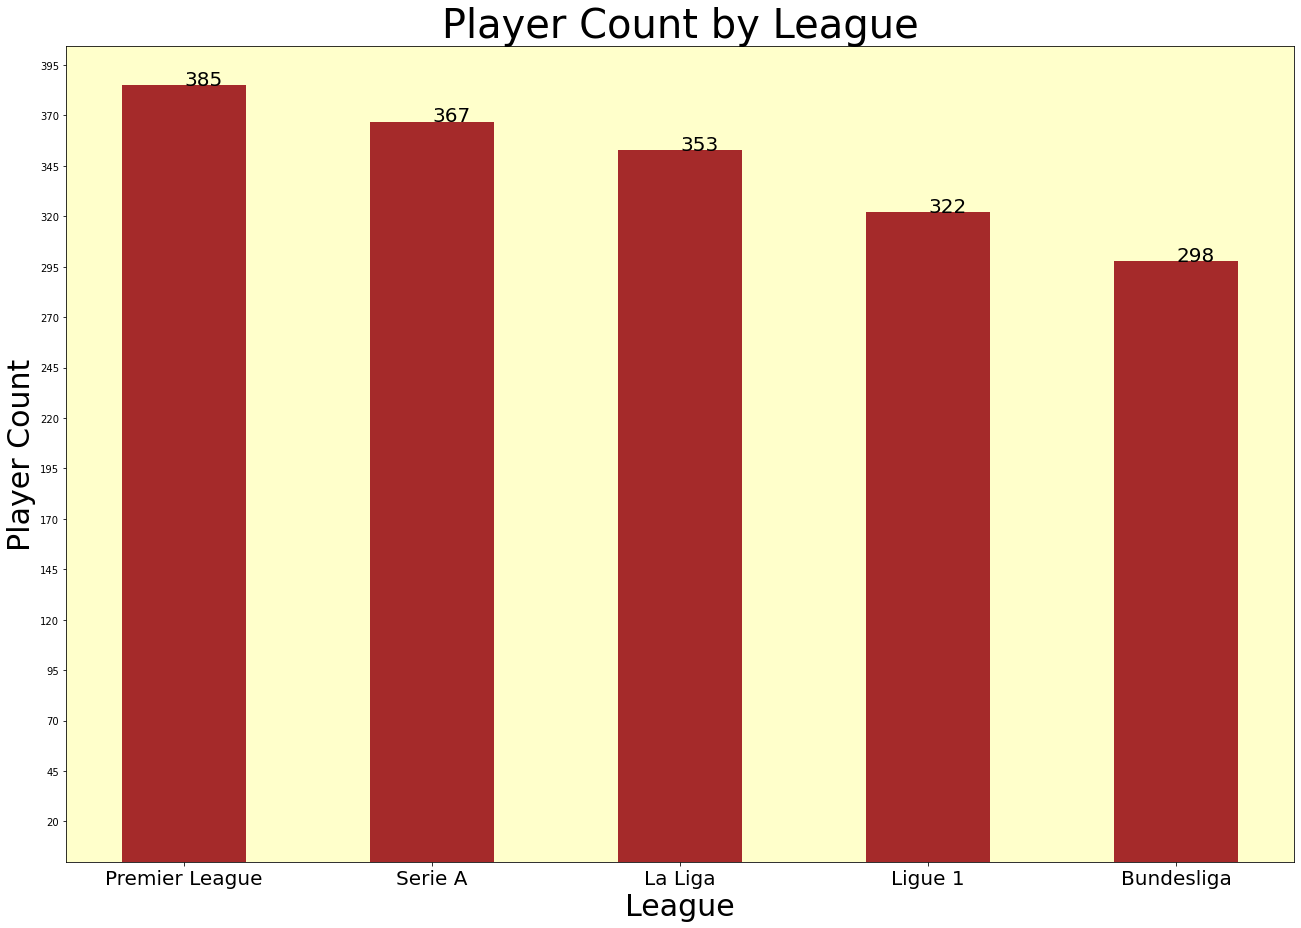

In [287]:
fig, ax = plt.subplots(figsize=(22,15))

x_labels = list(dict(df['League'].value_counts()).keys())
x_ticks = list(range(0,len(x_labels)))
y_values = [a for a in df['League'].value_counts()]
y_ticks = list(range(20,max(y_values)+30,25))


ax.bar(x_ticks,y_values,0.5,color='brown')


def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i],fontsize=20)

addlabels(x_ticks,y_values)
ax.set_yticks(y_ticks)
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels,fontsize=20)
ax.set_title('Player Count by League',fontsize=40)
ax.set_xlabel('League',fontsize=30)
ax.set_ylabel('Player Count',fontsize=30)
ax.set_facecolor('xkcd:ivory');

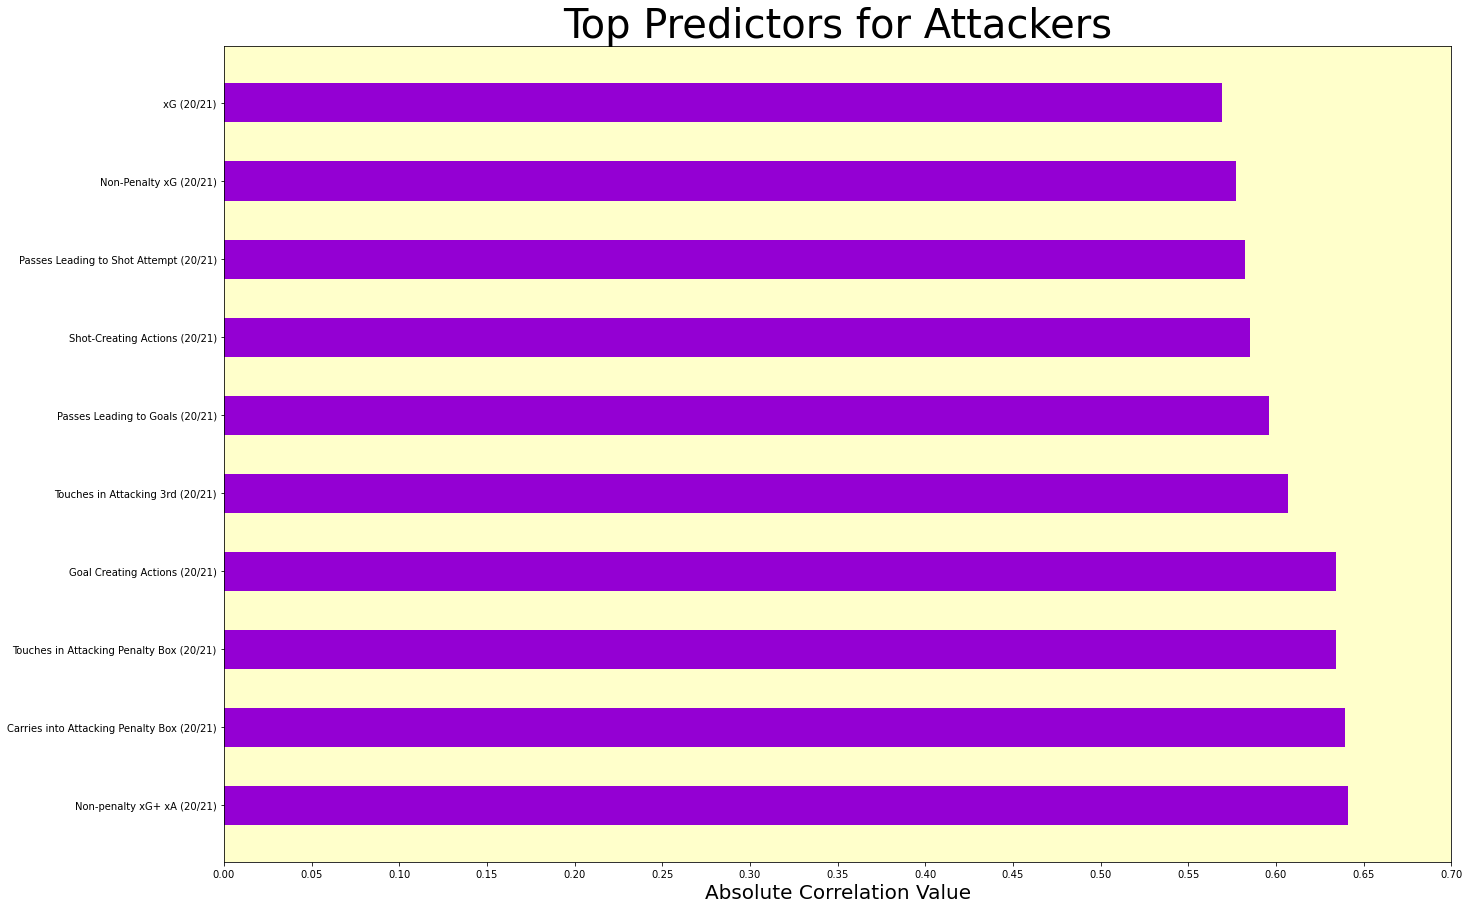

In [349]:
fig, ax = plt.subplots(figsize=(22,15))

y_labels = list(dict(abs(attackers.corr()['Value'].sort_values(ascending=False))[1:11]).keys())
y_ticks = list(range(0,len(x_labels)))
x_values = list(dict(abs(attackers.corr()['Value'].sort_values(ascending=False))[1:11]).values())
x_ticks = [a/100 for a in list(range(0,(int(max(x_values)*100)+10),5))]

ax.barh(y_ticks,x_values,0.5,color='darkviolet')

ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)
ax.set_xticks(x_ticks)
ax.set_xlabel('Absolute Correlation Value',fontsize=20)
ax.set_title('Top Predictors for Attackers',fontsize=40)
ax.set_facecolor('xkcd:ivory');

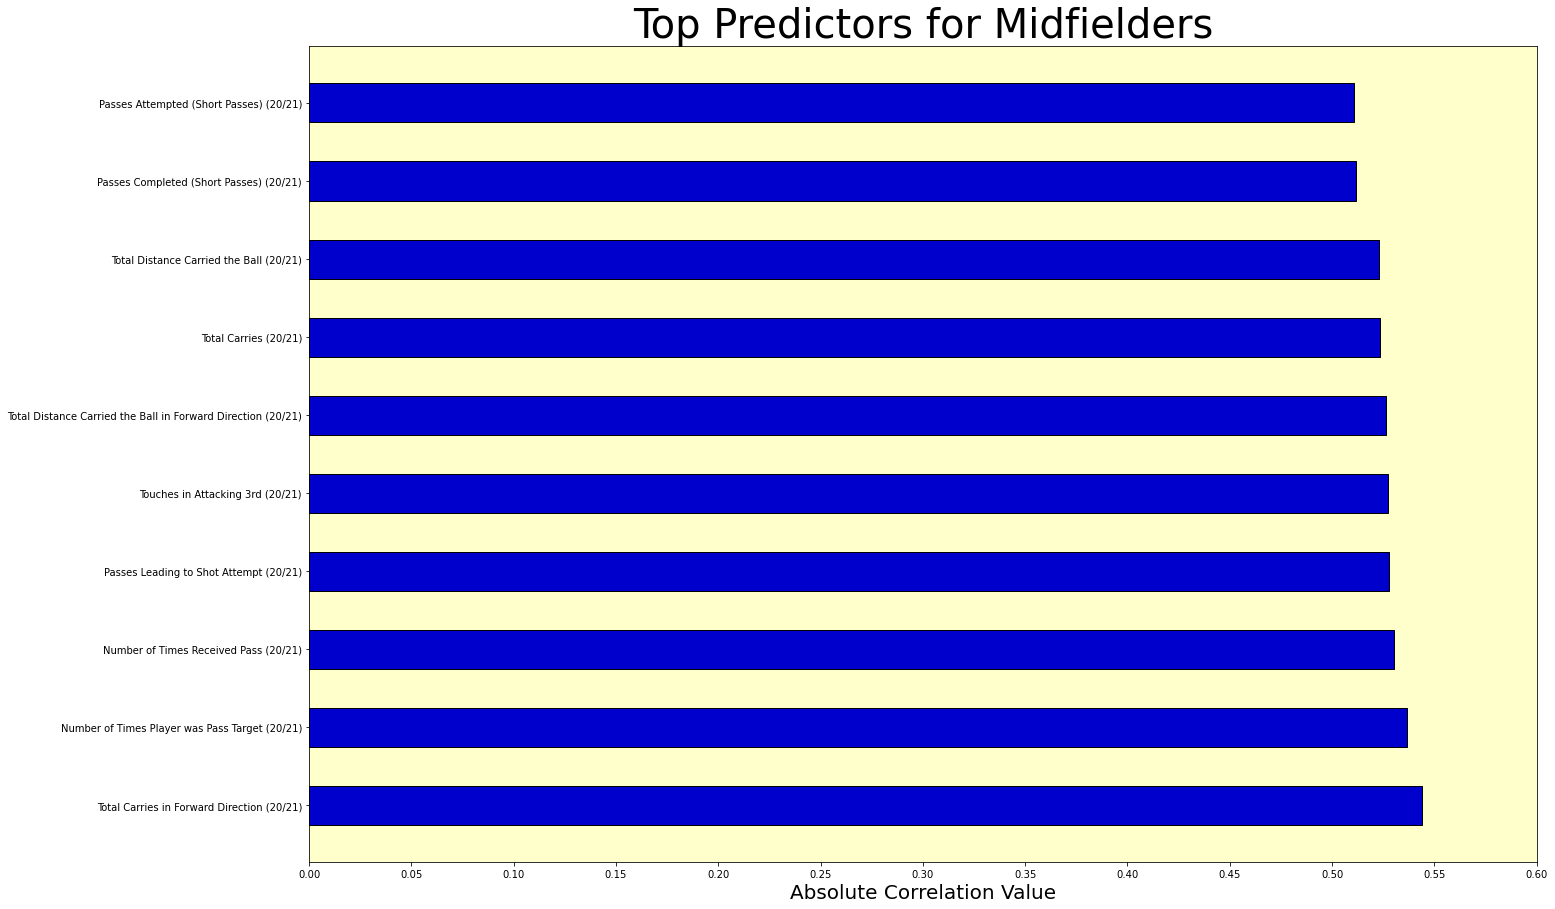

In [355]:
fig, ax = plt.subplots(figsize=(22,15))

y_labels = list(dict(abs(midfielders.corr()['Value'].sort_values(ascending=False))[1:11]).keys())
y_ticks = list(range(0,len(x_labels)))
x_values = list(dict(abs(midfielders.corr()['Value'].sort_values(ascending=False))[1:11]).values())
x_ticks = [a/100 for a in list(range(0,(int(max(x_values)*100)+10),5))]

ax.barh(y_ticks,x_values,0.5,color='mediumblue',edgecolor='black')

ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)
ax.set_xticks(x_ticks)
ax.set_xlabel('Absolute Correlation Value',fontsize=20)
ax.set_title('Top Predictors for Midfielders',fontsize=40)
ax.set_facecolor('xkcd:ivory');

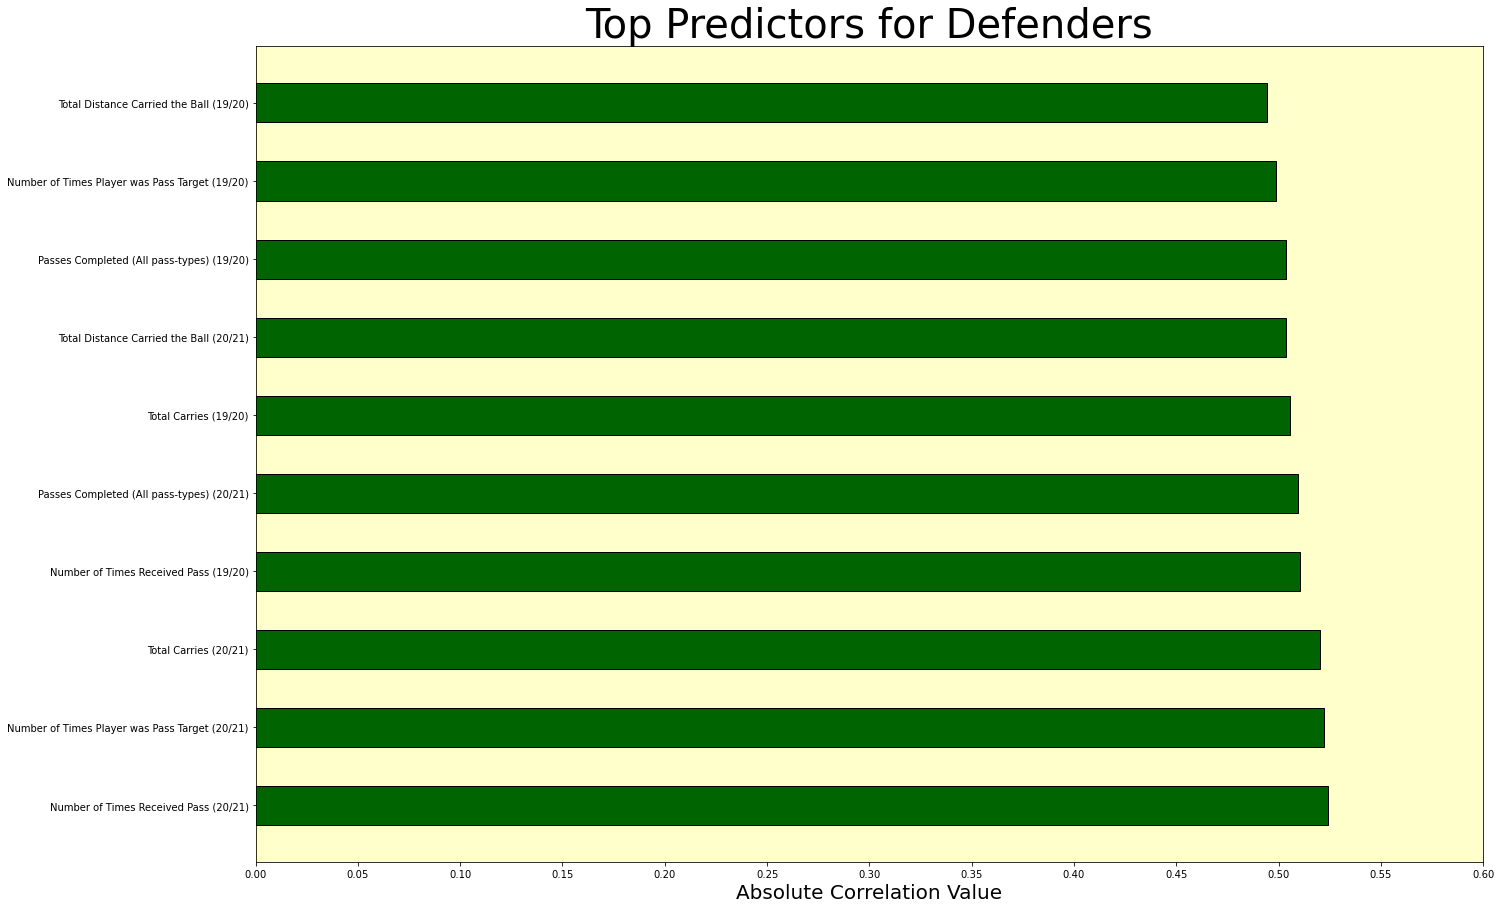

In [351]:
fig, ax = plt.subplots(figsize=(22,15))

y_labels = list(dict(abs(defenders.corr()['Value'].sort_values(ascending=False))[1:11]).keys())
y_ticks = list(range(0,len(x_labels)))
x_values = list(dict(abs(defenders.corr()['Value'].sort_values(ascending=False))[1:11]).values())
x_ticks = [a/100 for a in list(range(0,(int(max(x_values)*100)+10),5))]

ax.barh(y_ticks,x_values,0.5,color='darkgreen',edgecolor='black')

ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)
ax.set_xticks(x_ticks)
ax.set_xlabel('Absolute Correlation Value',fontsize=20)
ax.set_title('Top Predictors for Defenders',fontsize=40)
ax.set_facecolor('xkcd:ivory');